# DNA Sequencing Classification

The double-helix is the correct chemical representation of DNA. But DNA is special. It’s a nucleotide made of four types of nitrogen bases: Adenine (A), Thymine (T), Guanine (G), and Cytosine. We always call them A, C, Gand T.

These four chemicals link together via hydrogen bonds in any possible order making a chain, and this gives one thread of the DNA double-helix. And the second thread of the double-helix balance the first. So if you have A on the first thread, you have to have T on the second. 

Furthermore, C and G always balance each other. So once you identify one thread of the helix, you can always spell the other.

### DNA data handling using Biopython

Here is a brief example of how to work with a DNA sequence in fasta format using Biopython. The sequence object will contain attributes such as id and sequence and the length of the sequence that you can work with directly.


We will use Bio.SeqIO from Biopython for parsing DNA sequence data(fasta). It provides a simple uniform interface to input and output assorted sequence file formats.

In [1]:
# !pip install biopython

In [2]:
from Bio import SeqIO
for sequence in SeqIO.parse('./DataSets/DNA-Sequencing-Classification/example_dna.fa', "fasta"):
    print(sequence.id)
    print(sequence.seq)
    print(len(sequence))

ENST00000435737.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGAAGTCCTGGGGCTGACTCTCATTGTCTGGATTGACTGA
390
ENST00000419127.5
ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGACAAAGGCTGCTCTCAGTACTTCTATGCAGAGCATCTGTCTCTCCACTACCCGCTGGAGATTTCTGCAGCCTCAGGGAGGCTGATGTGTCACTTCAAGCTGGTGGCCATAGTGGGCTACCTGATTCGTCTCTCAATCAAGTCCATCCAAATCGAAGCCGACAACTGTGTCACTGACTCCCTGACCATTTACGACTCCCTTTTGCCCATCCGGAGCAG

So it produces the sequence ID, sequence and length of the sequence.



### Now that we can load and manipulate biological sequence data easily, how can we use it for machine learning or deep learning?

Now since machine learning or deep learning models require input to be feature matrices or numerical values and currently we still have our data in character or string format. So the next step is to encode these characters into matrices.


There are 3 general approaches to encode sequence data:

1. Ordinal encoding DNA Sequence

2. One-hot encoding DNA Sequence

3. DNA sequence as a “language”, known as k-mer counting

So let us implement each of them and see which gives us the perfect input features.

### Ordinal encoding DNA sequence data

In this approach, we need to encode each nitrogen bases as an ordinal value. For example “ATGC” becomes [0.25, 0.5, 0.75, 1.0]. Any other base such as “N” can be a 0.


So let us create functions such as for creating a NumPy array object from a sequence string, and a label encoder with the DNA sequence alphabet “a”, “c”, “g” and “t”, but also a character for anything else, “n”.

In [3]:
import numpy as np
import re
def string_to_array(seq_string):
   seq_string = seq_string.lower()
   seq_string = re.sub('[^acgt]', 'n', seq_string)
   seq_string = np.array(list(seq_string))
   return seq_string
# create a label encoder with 'acgtn' alphabet
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(np.array(['a','c','g','t','z']))

LabelEncoder()

And here is a function to encode a DNA sequence string as an ordinal vector. It returns a NumPy array with A=0.25, C=0.50, G=0.75, T=1.00, n=0.00.

In [4]:
def ordinal_encoder(my_array):
    integer_encoded = label_encoder.transform(my_array)
    float_encoded = integer_encoded.astype(float)
    float_encoded[float_encoded == 0] = 0.25 # A
    float_encoded[float_encoded == 1] = 0.50 # C
    float_encoded[float_encoded == 2] = 0.75 # G
    float_encoded[float_encoded == 3] = 1.00 # T
    float_encoded[float_encoded == 4] = 0.00 # anything else, lets say n
    return float_encoded


#Let’s try it out a simple short sequence:
seq_test = 'TTCAGCCAGTG'
ordinal_encoder(string_to_array(seq_test))

array([1.  , 1.  , 0.5 , 0.25, 0.75, 0.5 , 0.5 , 0.25, 0.75, 1.  , 0.75])

### One-hot encoding DNA Sequence

Another approach is to use one-hot encoding to represent the DNA sequence. This is widely used in deep learning methods and lends itself well to algorithms like convolutional neural networks. In this example, “ATGC” would become [0,0,0,1], [0,0,1,0], [0,1,0,0], [1,0,0,0]. And these one-hot encoded vectors can either be concatenated or turned into 2-dimensional arrays.

In [5]:
from sklearn.preprocessing import OneHotEncoder
def one_hot_encoder(seq_string):
    int_encoded = label_encoder.transform(seq_string)
    onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
    int_encoded = int_encoded.reshape(len(int_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(int_encoded)
    onehot_encoded = np.delete(onehot_encoded, -1, 1)
    return onehot_encoded


#So let’s try it out with a simple short sequence:
seq_test = 'GAATTCTCGAA'
one_hot_encoder(string_to_array(seq_test))

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

### DNA sequence as a “language”, known as k-mer counting

A hurdle that still remains is that none of these above methods results in vectors of uniform length, and that is a necessity for feeding data to a classification or regression algorithm. So with the above methods, you have to resort to things like truncating sequences or padding with “n” or “0” to get vectors of uniform length.


DNA and protein sequences can be seen as the language of life. The language encodes instructions as well as functions for the molecules that are found in all life forms. The sequence language resemblance continues with the genome as the book, subsequences (genes and gene families) are sentences and chapters, k-mers and peptides are words, and nucleotide bases and amino acids are the alphabets. Since the relationship seems so likely, it stands to reason that the natural language processing(NLP) should also implement the natural language of DNA and protein sequences.


The method we use here is manageable and easy. We first take the long biological sequence and break it down into k-mer length overlapping “words”. For example, if we use “words” of length 6 (hexamers), “ATGCATGCA” becomes: ‘ATGCAT’, ‘TGCATG’, ‘GCATGC’, ‘CATGCA’. Hence our example sequence is broken down into 4 hexamer words.


In genomics, we refer to these types of manipulations as “k-mer counting”, or counting the occurrences of each possible k-mer sequence and Python natural language processing tools make it super easy.

In [6]:
def Kmers_funct(seq, size):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]


#So let’s try it out with a simple sequence:
mySeq = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
Kmers_funct(mySeq, size=7)

['gtgccca',
 'tgcccag',
 'gcccagg',
 'cccaggt',
 'ccaggtt',
 'caggttc',
 'aggttca',
 'ggttcag',
 'gttcagt',
 'ttcagtg',
 'tcagtga',
 'cagtgag',
 'agtgagt',
 'gtgagtg',
 'tgagtga',
 'gagtgac',
 'agtgaca',
 'gtgacac',
 'tgacaca',
 'gacacag',
 'acacagg',
 'cacaggc',
 'acaggca',
 'caggcag']

It returns a list of k-mer “words.” You can then join the “words” into a “sentence”, then apply your favorite natural language processing methods on the “sentences” as you normally would.

In [7]:
words = Kmers_funct(mySeq, size=6)
joined_sentence = ' '.join(words)
joined_sentence

'gtgccc tgccca gcccag cccagg ccaggt caggtt aggttc ggttca gttcag ttcagt tcagtg cagtga agtgag gtgagt tgagtg gagtga agtgac gtgaca tgacac gacaca acacag cacagg acaggc caggca aggcag'

You can tune both the word length and the amount of overlap. This allows you to determine how the DNA sequence information and vocabulary size will be important in your application. For example, if you use words of length 6, and there are 4 letters, you have a vocabulary of size 4096 possible words. You can then go on and create a bag-of-words model like you would in NLP.


Let’s make a couple more “sentences” to make it more interesting.

In [8]:
mySeq1 = 'TCTCACACATGTGCCAATCACTGTCACCC'
mySeq2 = 'GTGCCCAGGTTCAGTGAGTGACACAGGCAG'
sentence1 = ' '.join(Kmers_funct(mySeq1, size=6))
sentence2 = ' '.join(Kmers_funct(mySeq2, size=6))

In [9]:
#Creating the Bag of Words model:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform([joined_sentence, sentence1, sentence2]).toarray()
X

array([[0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 1]], dtype=int64)

 Here comes machine learning…


Now that we have learned how to extract feature matrix from the DNA sequence, let us apply our newly acquired knowledge to a real-life machine learning use case.

**Objective:** Build a classification model that is trained on the human DNA sequence and can predict a gene family based on the DNA sequence of the coding sequence. To test the model, we will use the DNA sequence of humans, dogs, and chimpanzees and compare the accuracies.

Gene families are groups of related genes that share a common ancestor. Members of gene families may be paralogs or orthologs. Gene paralogs are genes with similar sequences from within the same species while gene orthologs are genes with similar sequences in different species.

The dataset contains human DNA sequence, Dog DNA sequence, and Chimpanzee DNA sequence.

### Analysis of the Input Data

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Load human DNA data

In [11]:
human_dna = pd.read_table('./DataSets/DNA-Sequencing-Classification/human.txt')
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


Text(0.5, 1.0, 'Class distribution of Human DNA')

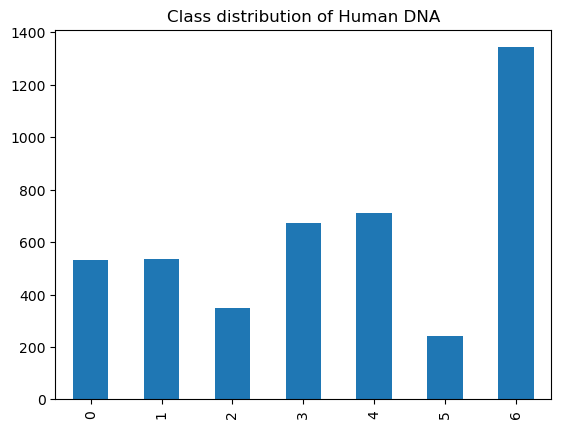

In [12]:
human_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Human DNA")

### Load Chimpanzee DNA data

In [13]:
chimp_dna = pd.read_table('./DataSets/DNA-Sequencing-Classification/chimpanzee.txt')
chimp_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


Text(0.5, 1.0, 'Class distribution of Chimpanzee DNA')

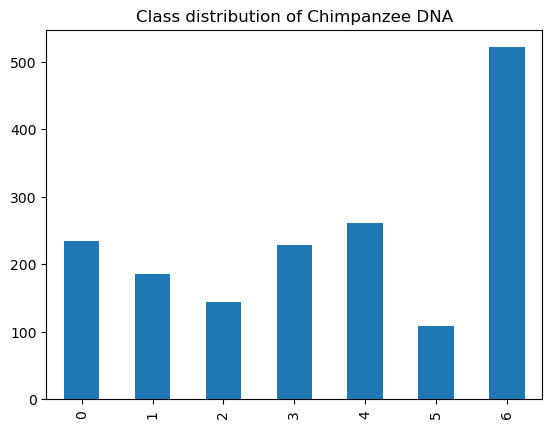

In [14]:
chimp_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Chimpanzee DNA")

### Load Dog DNA data

In [15]:
dog_dna = pd.read_table('./DataSets/DNA-Sequencing-Classification/dog.txt')
dog_dna.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


Text(0.5, 1.0, 'Class distribution of Dog DNA')

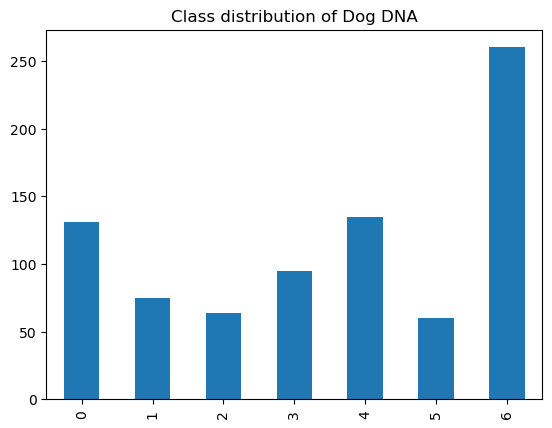

In [16]:
dog_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Dog DNA")

Here are the definitions for each of the 7 classes and how many there are in the human training data:
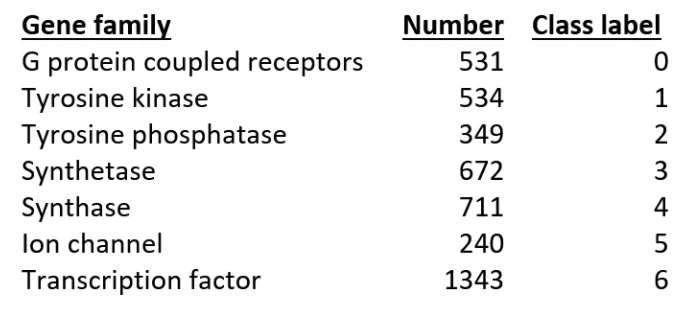

Now we have all our data loaded, the next step is to convert a sequence of characters into k-mer words, default **size = 6 (hexamers)**. The function **Kmers_funct()** will collect all possible overlapping k-mers of a specified length from any sequence string.

In [17]:
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]

#convert our training data sequences into short overlapping k-mers of length 6. 
#Lets do that for each species of data we have using our Kmers_funct function.

human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
human_dna = human_dna.drop('sequence', axis=1)

chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)

dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)

The DNA sequence is changed to lowercase, divided into all possible k-mer words of length 6, and ready for the next step.

In [18]:
human_dna.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


We need to now convert the lists of k-mers for each gene into string sentences of words that can be used to create the Bag of Words model. We will make a target variable y to hold the class labels.

In [19]:
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
    human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values # y_human for human_dna

Now let's do the same for chimp and dog.

In [20]:
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
    chimp_texts[item] = ' '.join(chimp_texts[item])
#separate labels
y_chim = chimp_dna.iloc[:, 0].values # y_chim for chimp_dna

dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
    dog_texts[item] = ' '.join(dog_texts[item])
#separate labels
y_dog = dog_dna.iloc[:, 0].values  # y_dog for dog_dna

In [21]:
y_human

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

In [22]:
y_chim

array([4, 4, 4, ..., 6, 3, 3], dtype=int64)

In [23]:
y_dog

array([4, 4, 6, 6, 0, 6, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 6, 0, 0, 0, 0, 0,
       6, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 0, 0, 3, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 0, 3, 3, 6, 6, 6, 6, 4, 0, 0, 4, 2, 0, 0, 0, 0, 6, 0, 6, 0,
       0, 5, 5, 6, 4, 6, 0, 0, 3, 6, 3, 6, 6, 6, 6, 6, 4, 6, 4, 1, 4, 0,
       0, 0, 6, 4, 4, 6, 6, 6, 6, 6, 4, 6, 6, 3, 3, 3, 3, 0, 6, 3, 3, 6,
       4, 4, 5, 6, 6, 1, 5, 2, 2, 1, 4, 2, 6, 3, 3, 6, 6, 6, 3, 3, 6, 6,
       6, 3, 6, 6, 2, 0, 0, 6, 6, 3, 3, 3, 0, 0, 4, 6, 6, 5, 1, 1, 0, 0,
       0, 4, 0, 4, 0, 0, 3, 4, 6, 0, 6, 6, 3, 4, 0, 6, 6, 1, 2, 2, 2, 3,
       6, 2, 2, 2, 6, 0, 0, 6, 6, 0, 0, 1, 6, 5, 5, 6, 0, 6, 0, 0, 4, 0,
       0, 3, 4, 0, 0, 6, 6, 5, 5, 3, 4, 1, 0, 6, 5, 6, 6, 4, 4, 2, 2, 2,
       4, 6, 4, 4, 2, 1, 3, 6, 0, 6, 2, 3, 0, 0, 6, 0, 6, 4, 3, 1, 1, 4,
       6, 4, 4, 6, 3, 3, 2, 2, 1, 1, 3, 3, 4, 3, 0, 3, 5, 5, 5, 5, 5, 5,
       5, 2, 2, 4, 4, 6, 4, 4, 6, 6, 6, 0, 3, 3, 4, 3, 0, 0, 6, 0, 0, 6,
       6, 1, 5, 5, 0, 0, 6, 6, 1, 1, 1, 4, 2, 2, 3,

So the target variable contains an array of class values.

Creating the Bag of Words model using CountVectorizer(). This is equivalent to k-mer counting. The n-gram size of 4 was previously determined by testing.

Convert our k-mer words into uniform length numerical vectors that represent counts for every k-mer in the vocabulary:

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

In [25]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


## Classification Models
Classification is a task that requires the use of machine learning algorithms that learn how to assign a class label to examples from the problem domain. An easy to understand example is classifying emails as “spam” or “not spam.”

There are many different types of classification tasks that you may encounter in machine learning and specialized approaches to modeling that may be used for each.

Here I am going to use these six algorithms and by checking the accuracy score I'll find out the perfect model.

* **Logistic Regression** : Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).
  
  
* **Decision Tree Classifier** : Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
  
  
* **Random Forest Classifier** : Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.
  
  
* **Naive Bayes** : This method is expected to be called several times consecutively on different chunks of a dataset so as to implement out-of-core or online learning. This is especially useful when the whole dataset is too big to fit in memory at once. This method has some performance and numerical stability overhead, hence it is better to call partial_fit on chunks of data that are as large as possible (as long as fitting in the memory budget) to hide the overhead.
  
  
* **KNN algorithm** : K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
  
  
* **Support Vector Machine Algorithm** : Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

So, for humans we have **4380** genes converted into uniform length feature vectors of 4-gram k-mer (length 6) counts. For chimp and dog, we have the same number of features with **1682** and **820** genes respectively.


So now that we know how to transform our DNA sequences into uniform length numerical vectors in the form of k-mer counts and ngrams, we can now go ahead and build a classification model that can predict the DNA sequence function based only on the sequence itself.


Here I will use the human data to train the model, holding out 20% of the human data to test the model. Then we can challenge the model’s generalizability by trying to predict sequence function in other species (the chimpanzee and dog).


Next, train/test split human dataset and build several classifier.


You might want to do some parameter tuning and build a model with different ngram sizes, here I’ll go ahead with an ngram size of 4 and a model alpha of 0.1.

<a id="train-test-split"></a>
**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 80:20 ratio
  * x_train and y_train are the trainning datasets
  * x_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [26]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_human, 
                                                    test_size = 0.20, 
                                                    random_state=42)

We will create a multinomial naive Bayes classifier. I previously did some parameter tuning and found the ngram size of 4 (reflected in the Countvectorizer() instance) and a model alpha of 0.1 did the best. Just to keep it simple I won't show that code here.

## Classification Models based on `Human DNA Data`

### Naive Bayes [Multinomial Naive Bayes] Algorithm

In [27]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

#Now let's make predictions on the human hold out test set and see how it performes on unseen data.

In [28]:
y_pred = classifier.predict(X_test)

Okay, so let's look at some model performce metrics like the confusion matrix, accuracy, precision, recall and f1 score. We are getting really good results on our unseen data, so it looks like our model did not overfit to the training data. In a real project I would go back and sample many more train test splits since we have a relatively small data set.

In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))


Confusion matrix for predictions on human test DNA sequence

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


### Random Forest Classifier Algorithm

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_pred = rfc.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted   0   1   2    3    4   5    6
Actual                                  
0          91   0   0    6    0   0    5
1           1  96   0    6    1   0    2
2           0   0  70    2    0   0    6
3           0   0   0  121    0   0    4
4           8   0   0    6  129   0    6
5           3   0   0    2    1  44    1
6           6   0   0    8    0   0  251
accuracy = 0.916 
precision = 0.923 
recall = 0.916 
f1 = 0.917


### K-Nearest Neighbouring Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted   0   1   2    3   4   5    6
Actual                                 
0          74   0   0    0   0   0   28
1           0  84   0    0   0   0   22
2           6   0  61    0   0   0   11
3           0   0   0  106   0   0   19
4          10   0   0    0  98   0   41
5           3   0   0    0   0  34   14
6           0   0   0    0   0   0  265
accuracy = 0.824 
precision = 0.874 
recall = 0.824 
f1 = 0.827


### Decision Tree Classifier Algorithm

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [38]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
y_pred = dtc.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted   0   1   2    3    4   5    6
Actual                                  
0          82   5   2    7    2   2    2
1          10  85   2    2    3   0    4
2           2   1  65    1    3   0    6
3           6   6   2  101    4   0    6
4          19   2   0    5  115   3    5
5           5   1   1    1    1  39    3
6          26   5   1    6    6   3  218
accuracy = 0.805 
precision = 0.823 
recall = 0.805 
f1 = 0.810


### Model Comparison on `Human DNA Dataset`

I have deployed four classification algorithms for the Human DNA Dataset. Now let's check the accuracy of the models and find out which model is highly efficient!

|Name of the model|Accuracy Score|
|:---:|:---:|
|Multinomial Naive Bayes Algorithm|0.98|
|Random Forest Classifier|0.92|
|Decision Tree Classifier|0.82|
|K-Nearest Neighbours Classifier|0.82|

**It is clearly visible that Multinomial Naive Bayes algorithm is perfectly suited for the Human DNA Dataset with an accuracy of more than 98%!**


-------------

## Classification Models based on `Chimpanzee DNA Data`

<a id="train-test-split"></a>
**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 80:20 ratio
  * x_train and y_train are the trainning datasets
  * x_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [41]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_chimp, 
                                                    y_chim, 
                                                    test_size = 0.20, 
                                                    random_state=42)

### Naive Bayes [Multinomial Naive Bayes] Algorithm

In [42]:
from sklearn.naive_bayes import MultinomialNB
classifier_c = MultinomialNB(alpha=0.1)
classifier_c.fit(X_trainc, y_trainc)

MultinomialNB(alpha=0.1)

In [43]:
y_predc = classifier_c.predict(X_testc)

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_testc, name='Actual'), pd.Series(y_predc, name='Predicted')))
def get_metrics(y_testc, y_predicted):
    accuracy = accuracy_score(y_testc, y_predicted)
    precision = precision_score(y_testc, y_predicted, average='weighted')
    recall = recall_score(y_testc, y_predicted, average='weighted')
    f1 = f1_score(y_testc, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_testc, y_predc)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted   0   1   2   3   4   5    6
Actual                                
0          27   0   0   0   0   0    1
1           0  38   0   0   0   0    1
2           0   0  25   0   0   0    2
3           0   0   0  41   0   0    2
4           2   1   0   3  40   0    6
5           3   0   0   0   3  19    4
6           0   0   0   1   0   0  118
accuracy = 0.914 
precision = 0.920 
recall = 0.914 
f1 = 0.911


### Random Forest Classifier

In [45]:
rfc_c = RandomForestClassifier()
rfc_c.fit(X_trainc, y_trainc)

RandomForestClassifier()

In [46]:
y_predc = rfc_c.predict(X_testc)

In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_testc, name='Actual'), pd.Series(y_predc, name='Predicted')))
def get_metrics(y_testc, y_predicted):
    accuracy = accuracy_score(y_testc, y_predicted)
    precision = precision_score(y_testc, y_predicted, average='weighted')
    recall = recall_score(y_testc, y_predicted, average='weighted')
    f1 = f1_score(y_testc, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_testc, y_predc)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted   0   1   2   3   4   5    6
Actual                                
0          20   0   0   0   0   0    8
1           0  34   0   0   0   0    5
2           0   0  27   0   0   0    0
3           1   0   0  36   0   0    6
4           0   0   0   0  34   0   18
5           4   0   0   1   0  18    6
6           1   0   0   0   0   0  118
accuracy = 0.852 
precision = 0.883 
recall = 0.852 
f1 = 0.850


### Decision Tree Classifier

In [48]:
dtc_c = DecisionTreeClassifier()
dtc_c.fit(X_trainc, y_trainc)

DecisionTreeClassifier()

In [49]:
y_predc = dtc_c.predict(X_testc)

In [50]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_testc, name='Actual'), pd.Series(y_predc, name='Predicted')))
def get_metrics(y_testc, y_predicted):
    accuracy = accuracy_score(y_testc, y_predicted)
    precision = precision_score(y_testc, y_predicted, average='weighted')
    recall = recall_score(y_testc, y_predicted, average='weighted')
    f1 = f1_score(y_testc, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_testc, y_predc)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted   0   1   2   3   4   5   6
Actual                               
0          20   1   1   1   2   0   3
1           1  32   0   2   1   0   3
2           0   0  25   0   1   0   1
3           1   0   0  31   3   1   7
4           1   0   2   1  38   0  10
5           0   2   0   1   3  19   4
6           5   7   1   3   3   2  98
accuracy = 0.780 
precision = 0.782 
recall = 0.780 
f1 = 0.779


### K-Nearest Neighbouring Algorithm

In [51]:
knn_c = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 
knn_c.fit(X_trainc, y_trainc)

KNeighborsClassifier()

In [52]:
y_predc = knn_c.predict(X_testc)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [53]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_testc, name='Actual'), pd.Series(y_predc, name='Predicted')))
def get_metrics(y_testc, y_predicted):
    accuracy = accuracy_score(y_testc, y_predicted)
    precision = precision_score(y_testc, y_predicted, average='weighted')
    recall = recall_score(y_testc, y_predicted, average='weighted')
    f1 = f1_score(y_testc, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_testc, y_predc)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted   0   1   2   3   4  5   6
Actual                              
0          16   0   0   0  12  0   0
1           0  30   0   0   9  0   0
2           0   1  22   1   3  0   0
3           0   0   0  36   7  0   0
4           0   0   0   2  50  0   0
5           1   4   0   1  13  9   1
6           0   0   0   3  49  0  67
accuracy = 0.682 
precision = 0.852 
recall = 0.682 
f1 = 0.705


### Model Comparison on `Chimpanzee DNA Dataset`

I have deployed four classification algorithms for the Chimpanzee DNA Dataset. Now let's check the accuracy of the models and find out which model is highly efficient!

|Name of the model|Accuracy Score|
|:---:|:---:|
|Multinomial Naive Bayes Algorithm|0.91|
|Random Forest Classifier|0.85|
|Decision Tree Classifier|0.77|
|K-Nearest Neighbours Classifier|0.68|

**It is clearly visible that Multinomial Naive Bayes algorithm is perfectly suited for the Human DNA Dataset with an accuracy of more than 91%!**





-----------

## Classification Models based on `Dog DNA Data`

**Training and Testing Dataset Spliting using the `train_test_split`**
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 80:20 ratio
  * x_train and y_train are the trainning datasets
  * x_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [54]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_traind, X_testd, y_traind, y_testd = train_test_split(X_dog, 
                                                    y_dog, 
                                                    test_size = 0.20, 
                                                    random_state=42)

### Naive Bayes [Multinomial Naive Bayes] Algorithm

In [55]:
classifier_d = MultinomialNB(alpha=0.1)
classifier_d.fit(X_traind, y_traind)

MultinomialNB(alpha=0.1)

In [56]:
y_predd = classifier_d.predict(X_testd)

In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_testd, name='Actual'), pd.Series(y_predd, name='Predicted')))
def get_metrics(y_testd, y_predicted):
    accuracy = accuracy_score(y_testd, y_predicted)
    precision = precision_score(y_testd, y_predicted, average='weighted')
    recall = recall_score(y_testd, y_predicted, average='weighted')
    f1 = f1_score(y_testd, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_testd, y_predd)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted   0   1   2  3  4  5   6
Actual                            
0          21   0   0  0  0  0   6
1           3  10   0  0  0  0   6
2           1   0  10  0  0  0   3
3           1   0   0  8  0  0   7
4           3   0   0  2  8  0  10
5           2   0   0  1  0  5   5
6           0   0   0  1  0  0  51
accuracy = 0.689 
precision = 0.781 
recall = 0.689 
f1 = 0.673


### Decision Tree Classifier

In [58]:
dtc_d = DecisionTreeClassifier()
dtc_d.fit(X_traind, y_traind)

DecisionTreeClassifier()

In [59]:
y_predd = dtc_d.predict(X_testd)

In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_testd, name='Actual'), pd.Series(y_predd, name='Predicted')))
def get_metrics(y_testd, y_predicted):
    accuracy = accuracy_score(y_testd, y_predicted)
    precision = precision_score(y_testd, y_predicted, average='weighted')
    recall = recall_score(y_testd, y_predicted, average='weighted')
    f1 = f1_score(y_testd, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_testd, y_predd)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted  0   1   2  3  4  5   6
Actual                           
0          8   1   2  2  3  2   9
1          1  11   0  3  3  1   0
2          1   0  12  0  0  0   1
3          4   0   0  3  2  1   6
4          3   0   1  0  7  3   9
5          3   0   0  1  4  1   4
6          0   0   2  3  5  1  41
accuracy = 0.506 
precision = 0.492 
recall = 0.506 
f1 = 0.487


### Random Forest Classifier

In [61]:
rfc_d = RandomForestClassifier()
rfc_d.fit(X_traind, y_traind)

RandomForestClassifier()

In [62]:
y_predd = rfc_d.predict(X_testd)

In [63]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_testd, name='Actual'), pd.Series(y_predd, name='Predicted')))
def get_metrics(y_testd, y_predicted):
    accuracy = accuracy_score(y_testd, y_predicted)
    precision = precision_score(y_testd, y_predicted, average='weighted')
    recall = recall_score(y_testd, y_predicted, average='weighted')
    f1 = f1_score(y_testd, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_testd, y_predd)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted  0  1   2  3  4  5   6
Actual                          
0          6  0   0  0  0  0  21
1          1  9   0  0  2  0   7
2          0  0  13  0  0  0   1
3          2  0   0  3  0  0  11
4          1  0   0  0  8  0  14
5          3  0   0  0  0  5   5
6          0  0   0  0  0  0  52
accuracy = 0.585 
precision = 0.715 
recall = 0.585 
f1 = 0.551


### K-Nearest Neighbouring Algorithms

In [64]:
knn_d = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 
knn_d.fit(X_traind, y_traind)

KNeighborsClassifier()

In [65]:
y_predd = knn_d.predict(X_testd)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [66]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_testd, name='Actual'), pd.Series(y_predd, name='Predicted')))
def get_metrics(y_testd, y_predicted):
    accuracy = accuracy_score(y_testd, y_predicted)
    precision = precision_score(y_testd, y_predicted, average='weighted')
    recall = recall_score(y_testd, y_predicted, average='weighted')
    f1 = f1_score(y_testd, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_testd, y_predd)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted  0  3   4   6
Actual                 
0          1  0  11  15
1          0  0   7  12
2          0  0   6   8
3          0  1   5  10
4          0  0   7  16
5          0  0   5   8
6          0  0   8  44
accuracy = 0.323 
precision = 0.406 
recall = 0.323 
f1 = 0.220


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model Comparison on `Dog DNA Dataset`

I have deployed four classification algorithms for the Chimpanzee DNA Dataset. Now let's check the accuracy of the models and find out which model is highly efficient!

|Name of the model|Accuracy Score|
|:---:|:---:|
|Multinomial Naive Bayes Algorithm|0.69|
|Random Forest Classifier|0.59|
|Decision Tree Classifier|0.51|
|K-Nearest Neighbours Classifier|0.32|

**It is clearly visible that Multinomial Naive Bayes algorithm is perfectly suited for the Human DNA Dataset with an accuracy of more than 69%!**


------------------------------

### Make this classification model more interesting!!

For 3 different datasets I have deployed four models for each of the datasets. But among all those deployed models, the model which is trained using the Human Dataset, is the best model. The Multinomial Naive Bayes Algorithm on the Human Dataset is the fitted algorithm.

|Name of the model|Accuracy Score|
|:---:|:---:|
|Multinomial Naive Bayes Algorithm on Human dataset|0.98|
|Multinomial Naive Bayes Algorithm on Chimpanzee dataset|0.91|
|Multinomial Naive Bayes Algorithm on dog dataset|0.69|

As the model trained on the human dataset is having higher accuracy, so I choose that model for further proceedings!

Now let's make something different with this highly fitted algorithm.

1. **Predicting Chimpanzee DNA using the Multinomial Naive Bayes (Human Model)**
2. **Predicting Dog DNA using the Multinomial Naive Bayes (Human Model)**


### Predicting Chimpanzee DNA using the Multinomial Naive Bayes (Human Model)

Now for the real test. Let's see how our model perfoms on the DNA sequences from other species. First we'll try the Chimpanzee, which we would expect to be very similar to human. Then we will try man's (and woman's) best friend, the Dog DNA sequences.

In [67]:
# Predicting the chimp, dog sequences
y_pred_chimp = classifier.predict(X_chimp)

In [68]:
# performance on chimpanzee genes
print("Confusion matrix for predictions on Chimpanzee test DNA sequence\n")
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_chim, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on Chimpanzee test DNA sequence

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


Let us now do predictions on Dog test DNA sequence.

### Predicting Dog DNA using the Multinomial Naive Bayes (Human Model)

In [69]:
y_pred_dog = classifier.predict(X_dog)

In [70]:
# performance on dog genes
print("Confusion matrix for predictions on Dog test DNA sequence\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on Dog test DNA sequence

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925


------------

### Model Comparison
Now let's compare these two models, deployed using the Human Training Dataset -

|Name of the model|Accuracy Score|
|:---:|:---:|
|**Predicting Chimpanzee DNA using the Multinomial Naive Bayes (Human Model)**|0.99|
|**Predicting Dog DNA using the Multinomial Naive Bayes (Human Model)**|0.93|

### Conclusion
- **For Human dataset, Multinomial Naive Bayes algorithm is the best fitted algorithm.**
- **For Chimpanzee dataset, Multinomial Naive Bayes algorithm is the best fitted algorithm.**
- **For Dog dataset, Multinomial Naive Bayes algorithm is the best fitted algorithm.**

Multinomial Naive Bayes algorithm trained on the Human dataset, predicts Chimpanzee and Dog DNA dataset more accurately than other trained models, by the accuracy of 99%. Because the Chimpanzee and humans share the same genetic hierarchy. The performance of the dog is not quite as good which is because the dog is more diverging from humans than the chimpanzee.

Hence the best fitted model for all the three datasets is,
**Multinomial Naive Bayes Algorithm trained on Human Dataset**

----------------

